In [2]:
#Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])  # converting job_posted_date to datetime object
df['job_skills'] = df['job_skills'].apply(lambda data: ast.literal_eval(data) if pd.notna(data) else data)  # converting job_skills to list

# Examples

In [3]:
df[['job_title_short', 'job_skills']].head()

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [4]:
df_exploded = df.explode('job_skills')

<Axes: xlabel='job_skills'>

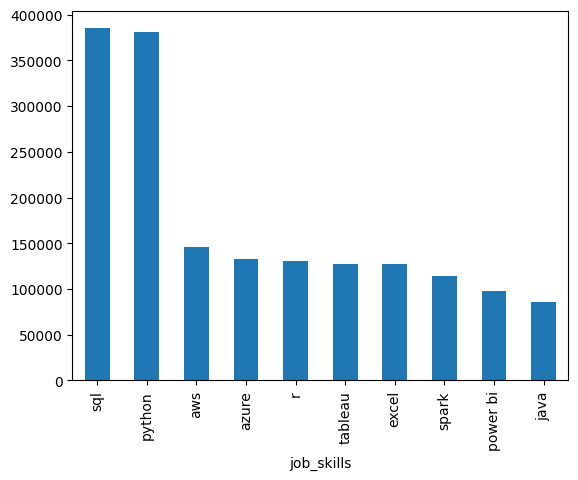

In [5]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')

In [7]:
skills_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()

type(skills_count)

pandas.core.series.Series

In [10]:
df_skills_count = skills_count.reset_index(name='skills_count')
df_skills_count = df_skills_count.sort_values(by='skills_count', ascending=False)

df_skills_count

,job_title_short,job_skills,skills_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
462,Data Analyst,chainer,1
432,Cloud Engineer,wrike,1
410,Cloud Engineer,theano,1
24,Business Analyst,chainer,1


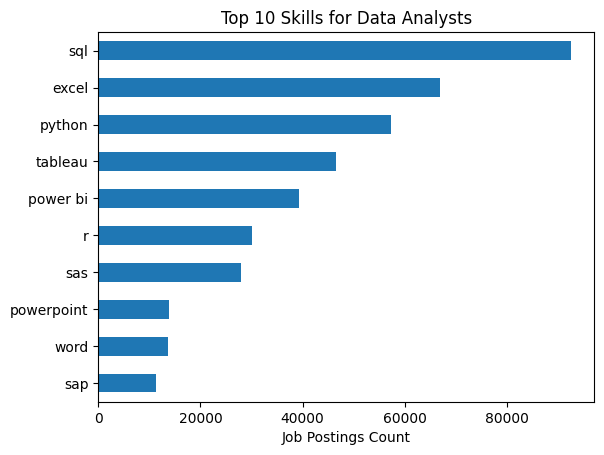

In [27]:
job_title = 'Data Analyst'
top_skills = 10

df_skills_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)
df_skills_final.plot(kind='barh', x='job_skills', y='skills_count')
plt.gca().invert_yaxis()
plt.title(f'Top {top_skills} Skills for {job_title}s')
plt.xlabel('Job Postings Count')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()

# Exercises

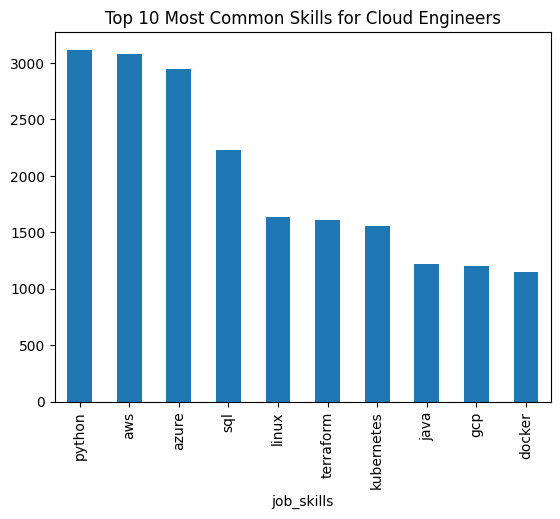

In [30]:
# Explode the job_skills column in the DataFrame and create a bar plot using pandas of the top 10 most common skills for Cloud Engineer.
# Add labels for the x-axis (label as 'Skills'), y-axis (label as 'Count') and a title (set as 'Top 10 Most Common Skills for Cloud Engineers') for the plot.

exercise_1_filtered = df[df['job_title_short'] == 'Cloud Engineer'].copy()
exercise_1_exploded = exercise_1_filtered.explode('job_skills')
exercise_1_exploded = exercise_1_exploded['job_skills'].value_counts()
exercise_1_exploded = exercise_1_exploded.sort_values(ascending=False).head(10).plot(kind='bar', x='Skills', y='Count', title='Top 10 Most Common Skills for Cloud Engineers')

In [37]:
# Explode the job_skills column in the DataFrame and calculate the average salary for each skill. Display the top 5 skills with the highest average salary.

exercise_2_exploded = df.explode('job_skills')
exercise_2_grouped = exercise_2_exploded.groupby('job_skills')['salary_year_avg'].mean().reset_index()
exercise_2_grouped = exercise_2_grouped.sort_values(by='salary_year_avg', ascending=False).head(5)
exercise_2_grouped

,job_skills,salary_year_avg
46,debian,196500.000000
177,ringcentral,182500.000000
114,lua,170500.000000
126,mongo,169526.929749
54,dplyr,160667.210526


In [42]:
# Explode the job_skills column in the DataFrame and calculate the number of unique skills for each job posting. Display the first 5 rows of the resulting DataFrame with a new column num_unique_skills.

exercise_3_exploded = df.explode('job_skills')
exercise_3_grouped = exercise_3_exploded.groupby('job_title_short')['job_skills'].nunique().reset_index()
exercise_3_grouped.columns = ['job_title_short', 'num_unique_skills']
exercise_3_grouped


,job_title_short,num_unique_skills
0,Business Analyst,223
1,Cloud Engineer,213
2,Data Analyst,235
3,Data Engineer,239
4,Data Scientist,237
5,Machine Learning Engineer,222
6,Senior Data Analyst,207
7,Senior Data Engineer,226
8,Senior Data Scientist,215
9,Software Engineer,239
